<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Harris_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Harris Corner Detection is a method used to identify corners in an image by analyzing the local changes in intensity gradients.

1. Import Libraries

In [129]:
import cv2 # OpenCV (Open Source Computer Vision Library)
import numpy as np
from matplotlib import pyplot as plt

2. Load Image

In [150]:
import requests # to make HTTP requests to fetch data from the internet
from PIL import Image # Python Imaging Library
from io import BytesIO # to work with binary data

url = "https://imgs.search.brave.com/qm6ynUDsZfYGUw8UPfnxxVWNCuXoPN5RRiT6NA5DjQU/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9pLnBp/bmltZy5jb20vb3Jp/Z2luYWxzL2IxLzll/LzhlL2IxOWU4ZWE2/ZjFjYTVmZjQ5M2M1/MDQyZTU2NmMzODVj/LmpwZw"
response = requests.get(url)
color = Image.open(BytesIO(response.content))
gray = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale, 0-255
color_array = np.array(color) # Convert to NumPy array
gray_float = np.float32(gray) # Convert to float32

3. Apply Harris Corner Detection

In [151]:
dst = cv2.cornerHarris(gray_float, 2, 3, 0.04) # (Input image; size of window for corner detection, 2x2; aperature size, used to calculate image derivatives; Harris detector free parameter in the range [0.04, 0.06], controlling the sensitivity to corners)

4. Threshold to identify corners

In [152]:
threshold = 0.01 * dst.max() # Sets a threshold to identify significant corners based on the Harris response values in dst
keypoints = np.argwhere(dst > threshold)  # Get coordinates of corners

5. Visualize keypoints on the image

In [153]:
keypoints_img = color_array.copy()

for kp in keypoints:
    cv2.circle(keypoints_img, (kp[1], kp[0]), 5, (255, 0, 0), -1)

6. Display Results

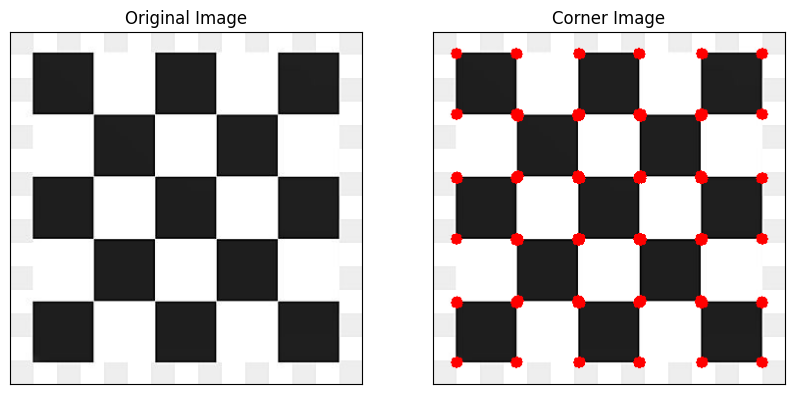

In [154]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(color)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(keypoints_img)
plt.title('Corner Image'), plt.xticks([]), plt.yticks([])
plt.show()